In [34]:
import pandas as pd
import numpy as np
import implicit
import nmslib
from scipy.sparse import csr_matrix

from surprise import NMF, KNNBasic, KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import Reader


from sklearn import model_selection
from surprise.model_selection import train_test_split

import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use('seaborn-whitegrid')






In [2]:
# dataFolder = 'ml-latest-small'
dataFolder = 'ml-latest-small'
links = pd.read_csv(dataFolder + '/links.csv')
movies = pd.read_csv(dataFolder + '/movies.csv')
ratings = pd.read_csv(dataFolder + '/ratings.csv')
tags = pd.read_csv(dataFolder + '/tags.csv')

In [3]:
# ratings.head()


In [4]:
# movieIds = movies['movieId'].unique()
# numMovies = len(movieIds)
# print('We have {} movies'.format(numMovies))

In [5]:
# userIds = ratings['userId'].unique()
# numUsers = len(userIds)
# print('We have {} users'.format(numUsers))

In [6]:
# movieUserMatrix = np.empty((numMovies, numUsers), dtype=int)
# 
# userIdToUserIndex = {}
# for index, userId in enumerate(userIds):
#     userIdToUserIndex[userId] = index
# 
# movieIdToMovieIndex = {}
# for index, movieId in enumerate(movieIds):
#     movieIdToMovieIndex[movieId] = index
# 
# for row in ratings.iterrows():
#     userId = row[1]['userId']
#     movieId = row[1]['movieId']
#     rating = row[1]['rating']
# 
#     userIndex = int(userIdToUserIndex[userId])
#     movieIndex = int(movieIdToMovieIndex[movieId])
# 
#     movieUserMatrix[movieIndex][userIndex] = int(rating)

In [7]:
# movieUserMatrixSparse = csr_matrix(movieUserMatrix)
# movieUserMatrixSparse

In [8]:
# #Matrix Factorization
# 
# 
# # initialize a model
# modelMatrixFactorization = implicit.als.AlternatingLeastSquares(factors=50)
# 
# # train the model on a sparse matrix of item/user/confidence weights
# modelMatrixFactorization.fit(movieUserMatrixSparse)
# 
# # recommend items for a user
# user_items = movieUserMatrixSparse.T.tocsr()
# userId = 1
# recommendations = modelMatrixFactorization.recommend(userId, user_items)
# 
# # find related items
# movieId = 1
# related = modelMatrixFactorization.similar_items(movieId)


In [9]:
# # Approximate Nearest Neighbors
# 
# 
# # initialize a model
# modelNearestNeighbor = implicit.approximate_als.NMSLibAlternatingLeastSquares()
# 
# # train the model on a sparse matrix of item/user/confidence weights
# modelNearestNeighbor.fit(movieUserMatrixSparse)
# 
# # recommend items for a user
# user_items = movieUserMatrixSparse.T.tocsr()
# userId = 1
# recommendations = modelNearestNeighbor.recommend(userId, user_items)
# 
# # find related items
# movieId = 1
# related = modelNearestNeighbor.similar_items(movieId)
# 


In [10]:
# # find related items
# movieIndex = 0
# 
# 
# def getMovieName(movieIndex):
#     return movies[movies['movieId'] == movieIds[movieIndex]].iloc[0]['title']
# 
# 
# movieName = getMovieName(movieIndex)
# 
# print('Looking at {}'.format(movieName))
# print('')
# 
# relatedMovies = modelMatrixFactorization.similar_items(movieIndex)
# 
# for movieIndex, confidence in relatedMovies:
#     movieName = getMovieName(movieIndex)
#     print('We are {:.0f}% confident that {} is similar'.format(confidence * 100, movieName))

In [11]:
# # find related items
# movieIndex = 0
# 
# 
# def getMovieName(movieIndex):
#     return movies[movies['movieId'] == movieIds[movieIndex]].iloc[0]['title']
# 
# 
# movieName = getMovieName(movieIndex)
# 
# print('Looking at {}'.format(movieName))
# print('')
# 
# relatedMovies = modelNearestNeighbor.similar_items(movieIndex)
# 
# for movieIndex, confidence in relatedMovies:
#     movieName = getMovieName(movieIndex)
#     print('We are {:.0f}% confident that {} is similar'.format(confidence * 100, movieName))

In [12]:
# from annoy import AnnoyIndex
# 
# f = 40
# model = AnnoyIndex(numMovies)  # Length of item vector that will be indexed
#     
# for index, movieRow in enumerate(movieUserMatrix.transpose()):
#     model.add_item(index, movieRow)
# 
# model.build(10) # 10 trees
# model.save('test.ann')
# 
# u = AnnoyIndex(f)
# u.load('test.ann') # super fast, will just mmap the file
# print(u.get_nns_by_item(0, 10)) # will find the 1000 nearest neighbors

In [54]:
ratingsAllDF = ratings[['userId', 'movieId', 'rating']]

ratingsTrainDF, ratingsTestDF = model_selection.train_test_split(ratingsAllDF, test_size=0.2, random_state=324)


In [55]:
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
ratingsTrainDataset = Dataset.load_from_df(ratingsTrainDF, reader)
# ratingsTrain = ratingsTrainDataset.build_full_trainset()

In [56]:
ratingsTest = np.asarray(ratingsTestDF)
# ratingsTrain, ratingsTest = train_test_split(ratingsData, test_size=.0)
# ratingsTest

In [70]:
print('Train data: {}'.format(ratingsTrainDataset.df.shape[0]))
print('Test data: {}'.format(len(ratingsTest)))


Train data: 80668
Test data: 20168


In [58]:
def runModel(ratings, model, paramGrid):
    
    crossValidationSplits = 5
    gridSearch = GridSearchCV(model, paramGrid, measures=['rmse', 'mae'], cv=crossValidationSplits)
    
    gridSearch.fit(ratings)
    
    return gridSearch

In [67]:
model = NMF
# paramGrid = {
#     'n_epochs': [10, 25, 50], 
#     'n_factors': [5, 15, 30],
#     'reg_pu': [0.1, 0.3, 0.5],
#     'reg_qi': [0.1, 0.3, 0.5],
#     'biased': [True, False],
#     'random_state': [42],
# }
paramGrid = {
    'n_epochs': [10], 
    'n_factors': [5],
    'reg_pu': [0.1],
    'reg_qi': [0.1],
    'biased': [True, False],
    'random_state': [42],
}
gridSearch = runModel(ratingsTrainDataset, model, paramGrid)

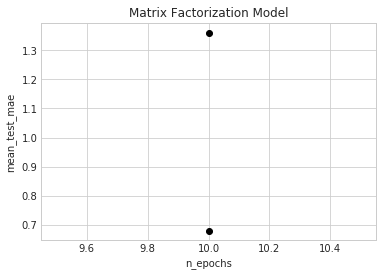

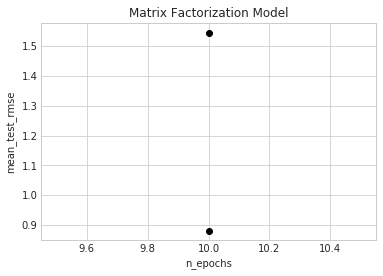

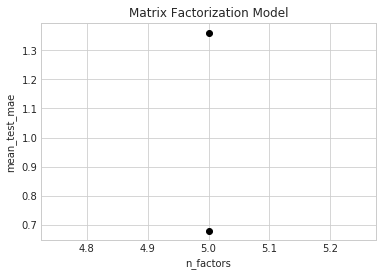

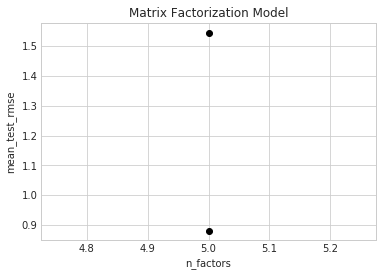

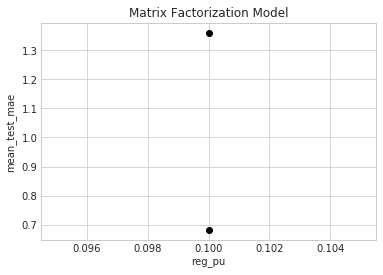

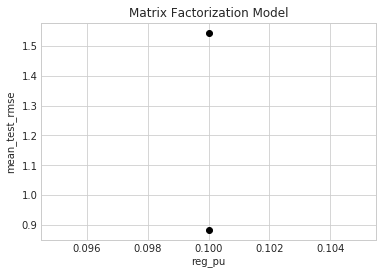

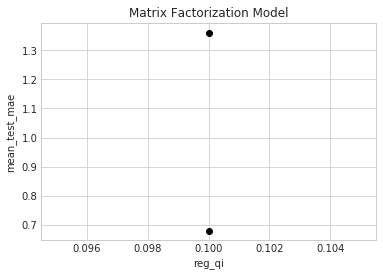

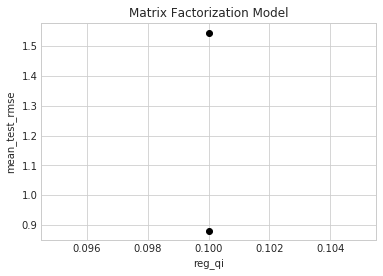

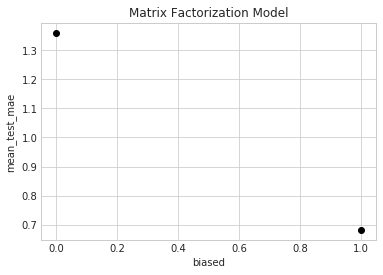

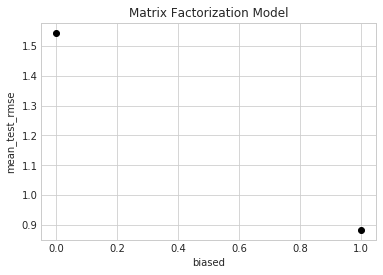

In [68]:
for param in paramGrid.keys():
    if param == 'random_state':
        continue
    for resultType in ['mean_test_mae', 'mean_test_rmse']:
        x = [result for result in gridSearch.cv_results['param_{}'.format(param)]]
        y = [result for result in gridSearch.cv_results[resultType]]
        
        plt.plot(x, y, 'o', color='black')
        plt.title('Matrix Factorization Model')
        plt.xlabel(param)
        plt.ylabel(resultType)
        plt.show()
        plt.close()

In [69]:
# best RMSE score
print('The best RMSE is {}'.format(gridSearch.best_score['rmse']))

# combination of parameters that gave the best RMSE score
print('The best params are {}'.format(gridSearch.best_params['rmse']))

The best RMSE is 0.8817371530955587
The best params are {'n_epochs': 10, 'n_factors': 5, 'reg_pu': 0.1, 'reg_qi': 0.1, 'biased': True, 'random_state': 42}


In [22]:
print(gridSearch.cv_results)

{'split0_test_rmse': array([0.93979627, 0.9271889 , 1.92274226, 1.74548046, 0.97516777,
       0.95499049, 1.28998659, 1.08124646]), 'split1_test_rmse': array([0.93631373, 0.92197962, 1.9300968 , 1.74879721, 0.96524045,
       0.95928844, 1.28184158, 1.07640407]), 'split2_test_rmse': array([0.92363522, 0.91874427, 1.9215396 , 1.73859924, 0.95518245,
       0.94384292, 1.27654055, 1.07734103]), 'split3_test_rmse': array([0.91793569, 0.9210884 , 1.9272713 , 1.75102454, 0.96725435,
       0.943302  , 1.27709531, 1.07642315]), 'split4_test_rmse': array([0.92311695, 0.91518562, 1.92260897, 1.74550729, 0.96772138,
       0.94141914, 1.2840903 , 1.07359988]), 'mean_test_rmse': array([0.92815957, 0.92083736, 1.92485179, 1.74588175, 0.96611328,
       0.9485686 , 1.28191087, 1.07700292]), 'std_test_rmse': array([0.00839439, 0.00395052, 0.0032807 , 0.00420201, 0.00642054,
       0.00717411, 0.00493968, 0.00246566]), 'rank_test_rmse': array([2, 1, 8, 7, 4, 3, 6, 5]), 'split0_test_mae': array([0.7

In [16]:
# model = KNNWithMeans
# paramGrid = {
#     'n_epochs': [5, 10], 
#     'n_factors': [10, 50],
#     'reg_pu': [0.4, 0.6]
# }
# runModel(ratingsTrain, model, paramGrid)

Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.


In [73]:
scales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

scores = []

for scale in scales:
    ratingsTrainSampledDF = ratingsTrainDF.sample(frac=scale, random_state=833)
    numRatings = ratingsTrainSampledDF.shape[0]
    # print('')
    # print('Using {} ratings'.format(numRatings))
    
    reader = Reader(rating_scale=(1, 5))
    ratingsTrainDataset = Dataset.load_from_df(ratingsTrainSampledDF, reader)
    
    model = NMF
    bestParamGrid = {
        'n_epochs': [10], 
        'n_factors': [5],
        'reg_pu': [0.1],
        'reg_qi': [0.1],
        'biased': [True],
        'random_state': [234],
    }
    gridSearch = runModel(ratingsTrainDataset, model, bestParamGrid)
    
    # best RMSE score
    bestScore = gridSearch.best_score['rmse']
    # print('The best RMSE of {}'.format(bestScore))
    scores.append(bestScore)


Using 8067 ratings



Using 16134 ratings



Using 24200 ratings



Using 32267 ratings



Using 40334 ratings



Using 48401 ratings



Using 56468 ratings



Using 64534 ratings



Using 72601 ratings



Using 80668 ratings


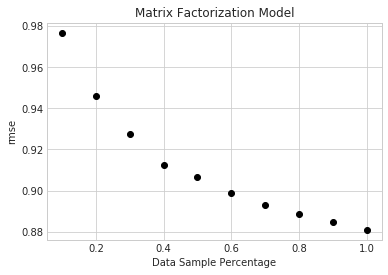

In [74]:
plt.plot(scales, scores, 'o', color='black')
plt.title('Matrix Factorization Model')
plt.xlabel('Data Sample Percentage')
plt.ylabel('rmse')
plt.show()
plt.close()